In [243]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


이번 실습에서는 선형회귀를 텐서플로우를 사용해보겠습니다.
선형회귀 실습에 사용할 데이터를 만들어보겠습니다.
데이터는 아래와 같이 정규분포를 사용해서 랜덤하게 만들었습니다.

In [244]:
num_points = 300

In [245]:
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]



그래프를 그려보면 x_data 와 y_data 는 선형의 관계에 있는 것을 쉽게 알 수가 있습니다.

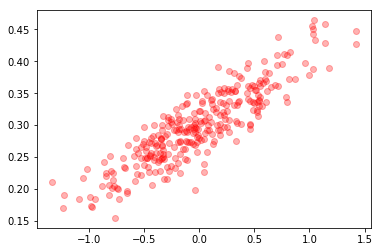

In [246]:
plt.plot(x_data, y_data, 'ro', alpha=0.3)

행렬(텐서)을 다룰 때 벡터화된 연산을 사용하면 더 알기 쉽고 사용하기도 편합니다.
벡터화된 연산을 사용해서 위의 데이터와 같은 조건으로 데이터를 다시 생산했습니다.

In [247]:
np.random.seed(379)
x_data = np.random.normal(0, 0.55, num_points)
y_data = x_data * 0.1 + np.random.normal(0.3, 0.03, num_points)

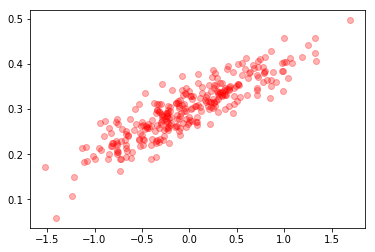

In [248]:
plt.plot(x_data, y_data, 'ro', alpha=0.3)

아래가 텐서플로우를 사용해서 선형회귀를 하는 코드입니다.


In [249]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable( tf.random_normal([1]) )
b = tf.Variable( tf.random_normal([1]) )

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [250]:
learning_rate = 0.005

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(cost)


In [251]:
tf.set_random_seed(378)

sess = tf.Session()
sess.run(tf.global_variables_initializer())



사용자가 정의한 비용 함수를 Gradient descent 방법으로 최소화시킬려고 합니다.
설정한 learning rate 는 0.005
이며 수동을 학습의 반복 횟수를 정할 수 있습니다.

루프 안에서의 계산 되는 데이터를 스텝과 함꼐 저장하기 위해서 namedtuple 을 사용했습니다.

In [252]:
from collections import namedtuple

Step_info = namedtuple('Step_info' ,'step cost W b')
training_process = []   # list for storing Step_info data


for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run( [cost, W, b, train],
                feed_dict={X:x_data, Y:y_data})
    if step % 100 == 0:
        print(step, cost_val, W_val, b_val)
        step_info = Step_info(step, cost_val, W_val, b_val)
        training_process.append(step_info)
    
    

0 0.194319 [-0.56959659] [ 0.50754339]
100 0.0820722 [-0.38502598] [ 0.36790016]
200 0.0411763 [-0.25242698] [ 0.31935275]
300 0.0219287 [-0.15643913] [ 0.30343521]
400 0.0120206 [-0.08668411] [ 0.29895291]
500 0.00679173 [-0.03589325] [ 0.29829007]
600 0.00401455 [ 0.0011257] [ 0.29876012]
700 0.00253712 [ 0.02812033] [ 0.29945144]
800 0.00175082 [ 0.04781003] [ 0.30008343]
900 0.00133231 [ 0.06217333] [ 0.30059105]
1000 0.00110954 [ 0.07265181] [ 0.30097845]
1100 0.00099097 [ 0.08029635] [ 0.30126733]
1200 0.000927856 [ 0.08587353] [ 0.30148032]
1300 0.000894261 [ 0.08994249] [ 0.30163661]
1400 0.00087638 [ 0.09291108] [ 0.30175093]
1500 0.000866862 [ 0.09507687] [ 0.3018344]
1600 0.000861795 [ 0.09665699] [ 0.30189541]
1700 0.000859099 [ 0.09780978] [ 0.30193987]
1800 0.000857663 [ 0.09865084] [ 0.3019723]
1900 0.000856899 [ 0.09926447] [ 0.30199596]
2000 0.000856493 [ 0.09971214] [ 0.30201316]


최종적으로 나온 W 와 b 의 결과는 아래와 같습니다.

학습에 사용한 데이터에서 W 는 기울기 b 는 y절편에 해당하는데,  기울기는 0.1, y 절편은 0.3 를 중심으로 데이터를 분산시켰다는 사실을 재확인 할 수 있습니다.

기존 산포도 그래프와 겹쳐서  신형회귀 직선을 그려보았습니다.

In [253]:
print(sess.run(W), sess.run(b))

[ 0.09971214] [ 0.30201316]


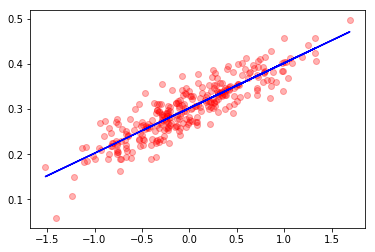

In [254]:
plt.plot(x_data, y_data, 'ro', alpha=0.3)
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b-')

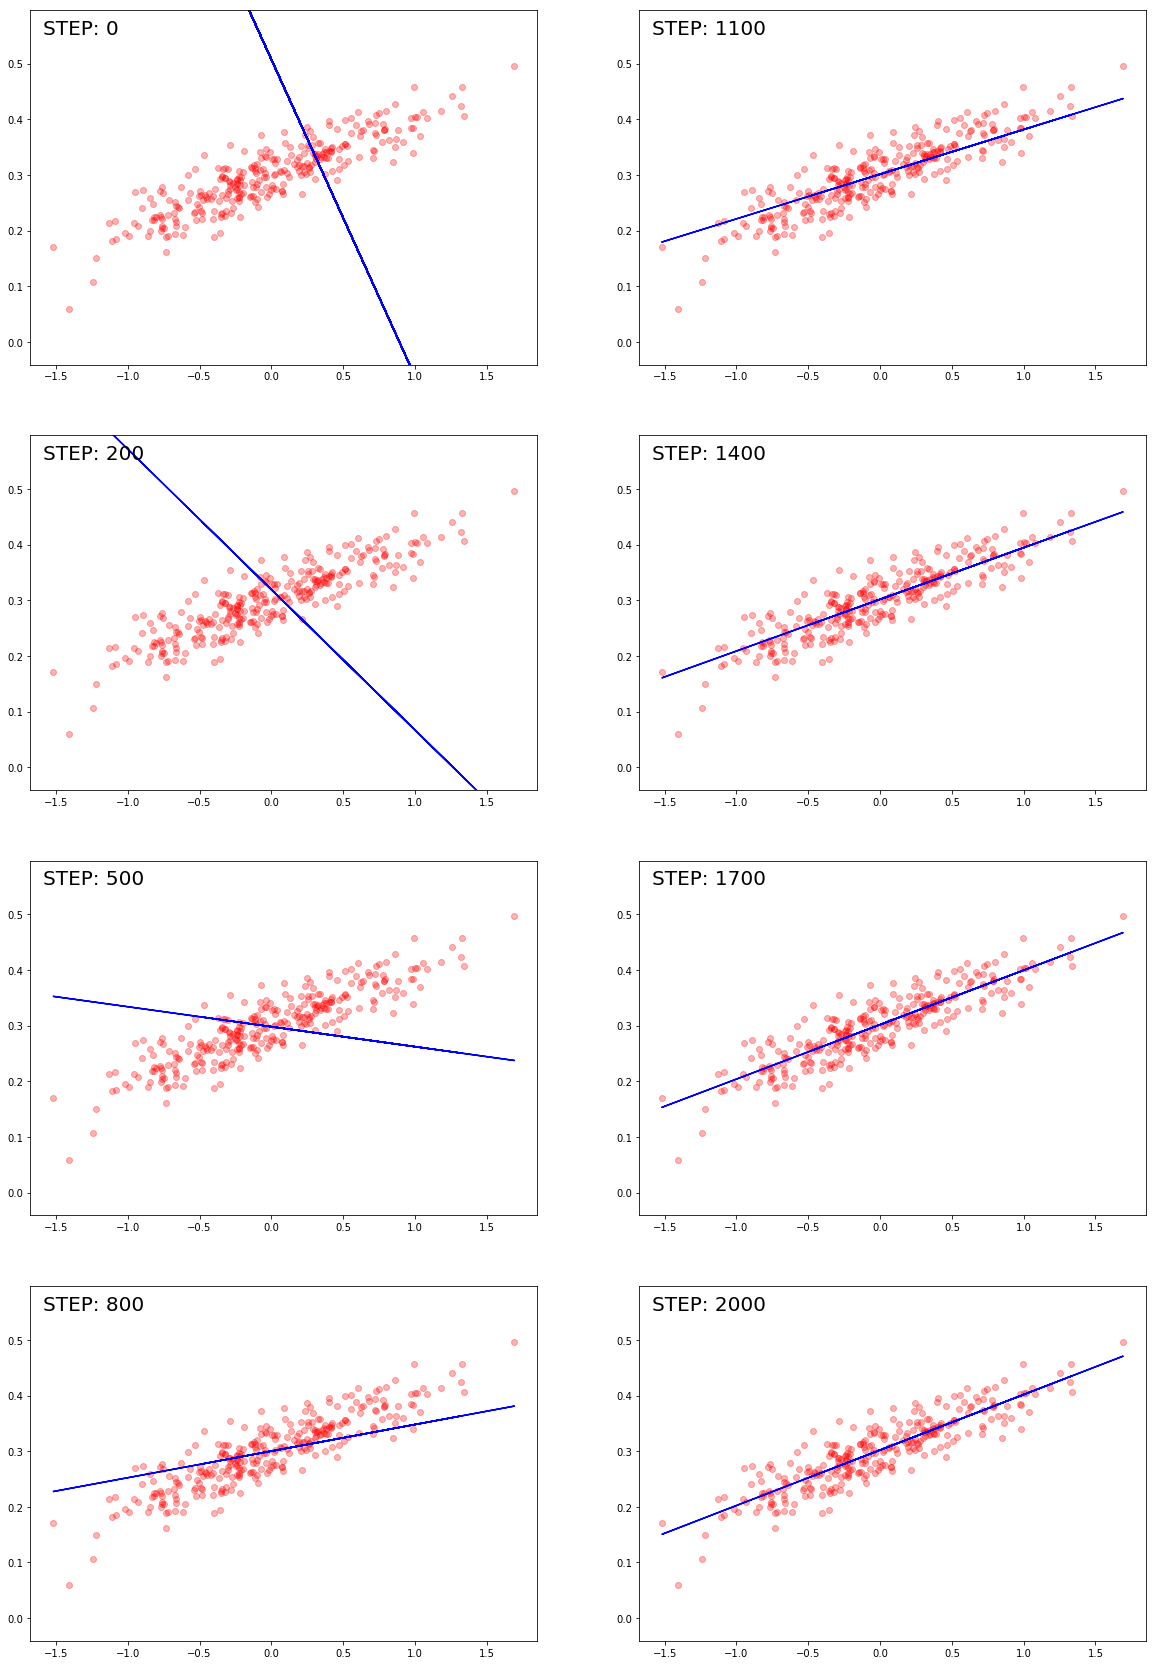

In [258]:
nrows=4; ncols=2;
fig, axes = plt.subplots(figsize=(20,30), nrows=nrows, ncols=ncols)

index = np.linspace(0,len(training_process)-1, nrows * ncols, endpoint=True)
index = np.floor(index).astype(int)


counter = 0
for c in range(ncols):
    for r in range(nrows):
        step, cost,w, b = training_process[index[counter]]
        counter += 1
        ax = axes[r,c]
        ax.plot(x_data, y_data, 'ro', alpha=0.3)
        ax.plot(x_data, w * x_data + b, 'b-')
        ax.annotate(('STEP: %s'% step),
            xy=(.025, .975), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
        ax.set_ylim(np.min(y_data) - 0.1, np.max(y_data) + 0.1)
        